# The Beautiful Game. Investigating European Football Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This football dataset is obtained from Kaggle. The data contains more than 25,000 matches, +10,000 players, 11 European countries, team squad formation with (X, Y) coordinates, detailed match events; for example, goal types, possessions, fouls, cards and many more. The dataset spans from 2008 to 2016 seasons and it comes in SQLite database format with 7 tables (Country, League, Match, Player, Player_Attributes, Team, and Team_Attributes). In addition, there are 199 columns combined in this database. We will extract what serves our purpose of analysis and try answer some questions; for instance, **what team improved over the period of time? which teams had scored the most number of goals? what attributes that leads the team to most victories?** and also dig in to explore players distinctions that dominates the game. 


All thanks to <a href="https://www.kaggle.com/hugomathien"> Hugo Mathien</a> for dedicating the time and effort to make this possbile. Further reading and ways to improve the project can be found in Hugo's github repo <a href="https://github.com/hugomathien/football-data-collection"> here.</a> 


In [379]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sqlite3 import connect
import os
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### Database connection

In [436]:
# database connection
db = os.getcwd()+'/database.sqlite'
conn = connect(db)



# perform joins

# team_df = pd.read_sql_query("""SELECT * 
#                   FROM Team as t 
#                   JOIN Team_Attributes as ta ON t.team_api_id=ta.team_api_id""", conn)

# player_df = pd.read_sql_query("""SELECT * 
#                   FROM Player as p 
#                   JOIN Player_Attributes as pa ON p.player_api_id=pa.player_api_id""", conn)


### Explore database tables

In [462]:
# explore database

db_tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", conn)
db_tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


### Explore tables

In [463]:
# Team table
pd.read_sql_query("SELECT * FROM Team", conn)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [464]:
# Team attributes table
pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [454]:
# Player table
pd.read_sql_query("SELECT * FROM Player", conn)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [8]:
# Player attributes table
pd.read_sql_query("SELECT * FROM Player_Attributes", conn)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [9]:
# Match table
pd.read_sql_query("SELECT * FROM Match", conn)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# League table
pd.read_sql_query("SELECT * FROM League", conn)


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [11]:
# Country table
pd.read_sql_query("SELECT * FROM Country", conn)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [465]:
# join league and country
pd.read_sql_query("SELECT l.country_id, l.name league_name, c.name country_name FROM Country c JOIN League l ON c.id=l.country_id;", conn)

,country_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [469]:
# convert queries to csv files

# team table
teams_query = pd.read_sql_query("""SELECT * 
                  FROM Team;""", conn)
teams_query.to_csv('teams.csv', index=False)

# team attribute table
team_att_query = pd.read_sql_query("""SELECT *
                    FROM Team_Attributes;""", conn)
team_att_query.to_csv('team_attributes.csv', index=False)

# player table
player_query = pd.read_sql_query("""SELECT * 
                  FROM Player;""", conn)
player_query.to_csv('player.csv', index=False)

# player attribute table
player_att_query = pd.read_sql_query("""SELECT *
                    FROM Player_Attributes;""", conn)
player_att_query.to_csv("player_attributes.csv", index=False)

# join league and country
league_query = pd.read_sql_query("""SELECT l.country_id, l.name league_name, c.name country_name 
                    FROM Country c JOIN League l ON c.id=l.country_id;""", conn)
league_query.to_csv("league.csv", index=False)

# match table
match_query = pd.read_sql_query("SELECT * FROM Match;", conn)
match_query.to_csv('match.csv', index=False)



In [638]:
# read csv files

teams_df = pd.read_csv("teams.csv")
team_attr_df = pd.read_csv("team_attributes.csv")
match_df = pd.read_csv('match.csv')
league_df = pd.read_csv('league.csv')
players_df = pd.read_csv("player.csv")
players_attr_df = pd.read_csv("player_attributes.csv")


### Data Preprocessing


**************
### teams_df


In [639]:
teams_df.shape

(299, 5)

In [640]:
teams_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [641]:
# summary of teams_df 
teams_df.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [642]:
# get columns with missing values
teams_df.loc[:,teams_df.isna().any()].columns

#frequency of missing values in teams_df
teams_df.isna().sum()/len(teams_df)*100


id                  0.00000
team_api_id         0.00000
team_fifa_api_id    3.67893
team_long_name      0.00000
team_short_name     0.00000
dtype: float64

In [643]:
# drop team_fifa_id, as it comes from FIFA game which we dont need
teams_df.drop(columns="team_fifa_api_id", inplace=True)


In [644]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               299 non-null    int64 
 1   team_api_id      299 non-null    int64 
 2   team_long_name   299 non-null    object
 3   team_short_name  299 non-null    object
dtypes: int64(2), object(2)
memory usage: 9.5+ KB


In [645]:
# check duplicates
# number of duplicates
teams_df.duplicated().any().sum()


0

In [646]:
teams_df.shape

(299, 4)

**************
###  team_attr_df


In [648]:
team_attr_df = pd.read_csv("team_attributes.csv") # read team_attributes.csv

In [649]:
team_attr_df.shape

(1458, 25)

In [650]:
team_attr_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [651]:
# summary stats 
team_attr_df.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [652]:
# get columns with missing values
team_attr_df.loc[:,team_attr_df.isna().any()].columns

#frequency of missing values in teams_df
team_attr_df.isna().sum()/len(team_attr_df)*100

id                                 0.000000
team_fifa_api_id                   0.000000
team_api_id                        0.000000
date                               0.000000
buildUpPlaySpeed                   0.000000
buildUpPlaySpeedClass              0.000000
buildUpPlayDribbling              66.460905
buildUpPlayDribblingClass          0.000000
buildUpPlayPassing                 0.000000
buildUpPlayPassingClass            0.000000
buildUpPlayPositioningClass        0.000000
chanceCreationPassing              0.000000
chanceCreationPassingClass         0.000000
chanceCreationCrossing             0.000000
chanceCreationCrossingClass        0.000000
chanceCreationShooting             0.000000
chanceCreationShootingClass        0.000000
chanceCreationPositioningClass     0.000000
defencePressure                    0.000000
defencePressureClass               0.000000
defenceAggression                  0.000000
defenceAggressionClass             0.000000
defenceTeamWidth                

In [653]:
# drop buildUpPlayDribbling column
team_attr_df.drop(columns="buildUpPlayDribbling", inplace=True)

In [654]:
team_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

In [655]:
# check duplicates
# number of duplicates
team_attr_df.duplicated().any().sum()

0

In [656]:
team_attr_df.shape

(1458, 24)

In [657]:
# convert date column data type

team_attr_df['date'] = pd.to_datetime(team_attr_df['date'])
team_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribblingClass       1458 non-null   object        
 7   buildUpPlayPassing              1458 non-null   int64         
 8   buildUpPlayPassingClass         1458 non-null   object        
 9   buildUpPlayPositioningClass     1458 non-null   object        
 10  chanceCreationPassing           1458 non-null   int64         
 11  chan

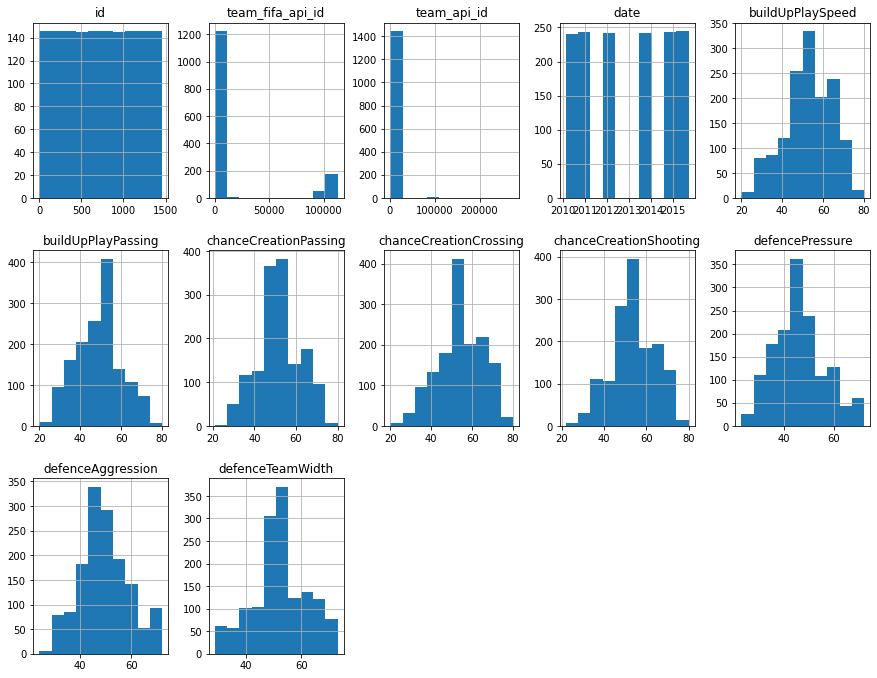

In [658]:
# histogram of team attributes
team_attr_df.hist(layout = (5,5),figsize=(15,20));


**************
###  match_df 


In [684]:
match_df = pd.read_csv("match.csv") #read match.csv

In [685]:
match_df.shape

(25979, 115)

In [686]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [687]:
# summary statistics
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [688]:
# get column names and indices
for i, j in enumerate(match_df.columns):
    print(i, j)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

In [689]:
# too many columns check first 30
match_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Dtype  
---   ------            -----  
 0    id                int64  
 1    country_id        int64  
 2    league_id         int64  
 3    season            object 
 4    stage             int64  
 5    date              object 
 6    match_api_id      int64  
 7    home_team_api_id  int64  
 8    away_team_api_id  int64  
 9    home_team_goal    int64  
 10   away_team_goal    int64  
 11   home_player_X1    float64
 12   home_player_X2    float64
 13   home_player_X3    float64
 14   home_player_X4    float64
 15   home_player_X5    float64
 16   home_player_X6    float64
 17   home_player_X7    float64
 18   home_player_X8    float64
 19   home_player_X9    float64
 20   home_player_X10   float64
 21   home_player_X11   float64
 22   away_player_X1    float64
 23   away_player_X2    float64
 24   away_player_X3    float64
 25   away_player_X4    fl

In [690]:
match_df.columns[85:]

Index(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD',
       'BSA'],
      dtype='object')

In [691]:
# drop betting columns

match_df.drop(match_df.columns[85:], axis=1, inplace=True)

In [692]:
# check columns with missing values
match_df.loc[:,match_df.isna().any()].columns


Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 

In [693]:
# get frequency of missing values in each column 
print(match_df.isna().sum()/len(match_df)*100)


id             0.00000
country_id     0.00000
league_id      0.00000
season         0.00000
stage          0.00000
                ...   
foulcommit    45.27503
card          45.27503
cross         45.27503
corner        45.27503
possession    45.27503
Length: 85, dtype: float64


In [694]:
for i, j in enumerate(match_df):
    print(i, j, match_df[j].isna().sum()/len(match_df)*100)

0 id 0.0
1 country_id 0.0
2 league_id 0.0
3 season 0.0
4 stage 0.0
5 date 0.0
6 match_api_id 0.0
7 home_team_api_id 0.0
8 away_team_api_id 0.0
9 home_team_goal 0.0
10 away_team_goal 0.0
11 home_player_X1 7.009507679279419
12 home_player_X2 7.009507679279419
13 home_player_X3 7.051849570807191
14 home_player_X4 7.051849570807191
15 home_player_X5 7.051849570807191
16 home_player_X6 7.051849570807191
17 home_player_X7 7.051849570807191
18 home_player_X8 7.051849570807191
19 home_player_X9 7.051849570807191
20 home_player_X10 7.051849570807191
21 home_player_X11 7.051849570807191
22 away_player_X1 7.051849570807191
23 away_player_X2 7.051849570807191
24 away_player_X3 7.051849570807191
25 away_player_X4 7.051849570807191
26 away_player_X5 7.051849570807191
27 away_player_X6 7.051849570807191
28 away_player_X7 7.051849570807191
29 away_player_X8 7.051849570807191
30 away_player_X9 7.055698833673352
31 away_player_X10 7.055698833673352
32 away_player_X11 7.078794410870318
33 home_player_Y1 

In [695]:
# inspect missing values > 20%
print('***Printing goal column unique values***\n')
print(match_df['goal'].unique()[:2])
print('\n'*2)
print('***Printing shoton column unique values***\n')
print(match_df['shoton'].unique()[:2])
print('\n'*2)
print('***Printing foulcommit column unique values***\n')
print(match_df['foulcommit'].unique()[:2])
print('\n'*2)
print('***Printing card column unique values***\n')
print(match_df['card'].unique()[:2])
print('\n'*2)
print('***Printing cross column unique values***\n')
print(match_df['cross'].unique()[:2])
print('\n'*2)
print('***Printing corner column unique values***\n')
print(match_df['corner'].unique()[:2])
print('\n'*2)
print('***Printing possession column unique values***\n')
print(match_df['possession'].unique()[:2])

# data were scraped with a lot of noise

***Printing goal column unique values***

[nan
 '<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>']



***Printing shoton column unique values***

[nan
 '<shoton><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>3</elapsed><subtype>blocked_shot</subtype><player1>24154</player1><sortorder>0</sortorder><team>10260</

In [696]:
match_df['home_player_Y1'].unique()

array([nan,  1.,  3.,  0.])

In [697]:
match_df['home_player_X2'].unique()

array([nan,  2.,  4.,  3.,  1.,  5.,  6.,  8.,  7.,  0.])

In [698]:
match_df['away_player_Y1'].unique()

array([nan,  1.,  3.])

In [699]:
# drop unexplainable and coordinates columns
match_df.drop(match_df.columns[np.r_[11:55, 77:85]], axis=1, inplace=True)

In [700]:
# check missing values
for i, j in enumerate(match_df):
    print(i, j, match_df[j].isna().sum()/len(match_df)*100)

0 id 0.0
1 country_id 0.0
2 league_id 0.0
3 season 0.0
4 stage 0.0
5 date 0.0
6 match_api_id 0.0
7 home_team_api_id 0.0
8 away_team_api_id 0.0
9 home_team_goal 0.0
10 away_team_goal 0.0
11 home_player_1 4.711497748181223
12 home_player_2 5.0617806690018865
13 home_player_3 4.930905731552407
14 home_player_4 5.092574771931175
15 home_player_5 5.065629931868047
16 home_player_6 5.100273297663498
17 home_player_7 4.723045536779707
18 home_player_8 5.038685091804919
19 home_player_9 4.900111628623119
20 home_player_10 5.527541475807383
21 home_player_11 5.985603756880558
22 away_player_1 4.749990376842835
23 away_player_2 4.9193579429539245
24 away_player_3 4.977096885946342
25 away_player_4 5.084876246198853
26 away_player_5 5.138765926325109
27 away_player_6 5.0540821432695635
28 away_player_7 4.753839639708995
29 away_player_8 5.161861503522076
30 away_player_9 5.111821086261981
31 away_player_10 5.546787790138189
32 away_player_11 5.981754494014396


In [701]:
match_df['home_player_1'].unique() 
match_df['away_player_2'].unique()


array([    nan,  38388.,  38293., ...,  27232., 458806.,  92252.])

In [702]:
# missing values on *_player_number indicates the participation of a player in a particular match

match_df.iloc[:,np.r_[9:11,11:33]]

,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1,0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,...,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0
25975,1,2,33272.0,41621.0,25813.0,257845.0,114735.0,42237.0,113227.0,358156.0,...,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0
25976,2,0,157856.0,274779.0,177689.0,294256.0,42258.0,39979.0,173936.0,147959.0,...,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0
25977,0,0,NaN,8881.0,173534.0,39646.0,282287.0,340790.0,393337.0,8893.0,...,121080.0,197757.0,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0


In [703]:
# filling missing values with 0
match_df.fillna(0, inplace=True)

In [704]:
match_df.shape

(25979, 33)

In [705]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   country_id        25979 non-null  int64  
 2   league_id         25979 non-null  int64  
 3   season            25979 non-null  object 
 4   stage             25979 non-null  int64  
 5   date              25979 non-null  object 
 6   match_api_id      25979 non-null  int64  
 7   home_team_api_id  25979 non-null  int64  
 8   away_team_api_id  25979 non-null  int64  
 9   home_team_goal    25979 non-null  int64  
 10  away_team_goal    25979 non-null  int64  
 11  home_player_1     25979 non-null  float64
 12  home_player_2     25979 non-null  float64
 13  home_player_3     25979 non-null  float64
 14  home_player_4     25979 non-null  float64
 15  home_player_5     25979 non-null  float64
 16  home_player_6     25979 non-null  float6

In [706]:
# check duplicates
match_df.duplicated().sum()

0

In [707]:
# convert date to datetime
match_df['date'] = pd.to_datetime(match_df['date'])

In [708]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                25979 non-null  int64         
 1   country_id        25979 non-null  int64         
 2   league_id         25979 non-null  int64         
 3   season            25979 non-null  object        
 4   stage             25979 non-null  int64         
 5   date              25979 non-null  datetime64[ns]
 6   match_api_id      25979 non-null  int64         
 7   home_team_api_id  25979 non-null  int64         
 8   away_team_api_id  25979 non-null  int64         
 9   home_team_goal    25979 non-null  int64         
 10  away_team_goal    25979 non-null  int64         
 11  home_player_1     25979 non-null  float64       
 12  home_player_2     25979 non-null  float64       
 13  home_player_3     25979 non-null  float64       
 14  home_player_4     2597

In [709]:
# convert players column to int
match_df[match_df.columns[11:33]] = match_df[match_df.columns[11:33]].apply(lambda x: x.astype(int))

In [710]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                25979 non-null  int64         
 1   country_id        25979 non-null  int64         
 2   league_id         25979 non-null  int64         
 3   season            25979 non-null  object        
 4   stage             25979 non-null  int64         
 5   date              25979 non-null  datetime64[ns]
 6   match_api_id      25979 non-null  int64         
 7   home_team_api_id  25979 non-null  int64         
 8   away_team_api_id  25979 non-null  int64         
 9   home_team_goal    25979 non-null  int64         
 10  away_team_goal    25979 non-null  int64         
 11  home_player_1     25979 non-null  int64         
 12  home_player_2     25979 non-null  int64         
 13  home_player_3     25979 non-null  int64         
 14  home_player_4     2597

*************
### players_df

In [711]:
players_df = pd.read_csv("player.csv") #read players.csv

In [712]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [713]:
players_df.shape

(11060, 7)

In [714]:
players_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [715]:
# get column names and indices
for i, j in enumerate(players_df.columns):
    print(i, j)

0 id
1 player_api_id
2 player_name
3 player_fifa_api_id
4 birthday
5 height
6 weight


In [716]:
# get columns with missing values

players_df.loc[:, players_df.isna().any()].columns

Index([], dtype='object')

In [717]:
# percentage of missing value in each column

players_df.isna().sum()/len(players_df)*100 

id                    0.0
player_api_id         0.0
player_name           0.0
player_fifa_api_id    0.0
birthday              0.0
height                0.0
weight                0.0
dtype: float64

In [718]:
players_df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [719]:
# check for duplicates
players_df.duplicated().sum()

0

In [720]:
players_df.shape

(11060, 7)

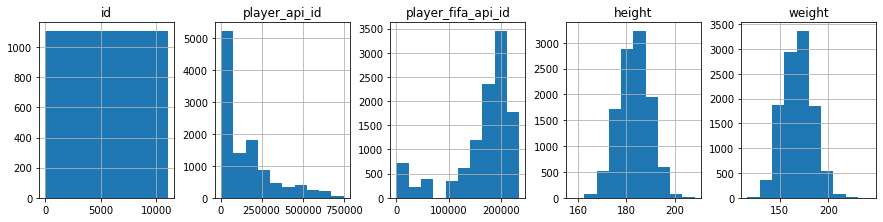

In [721]:
# histogram of players 
players_df.hist(layout = (5,5),figsize=(15,20));

*************
### players_attr_df

In [722]:
players_attr_df = pd.read_csv("player_attributes.csv") # read players attribute csv

In [723]:
players_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [724]:
players_attr_df.shape

(183978, 42)

In [725]:
players_attr_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [726]:
# get columns with missing values

players_attr_df.loc[:, players_attr_df.isna().any()].columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [727]:
# percentage of missing value in each column

players_attr_df.isna().sum()/len(players_attr_df)*100 

id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

In [728]:
# print unique column values
for i, cname in enumerate(players_attr_df.columns[4:]):
    print(cname, players_attr_df[cname].unique())

overall_rating [67. 62. 61. 74. 73. 71. 70. 69. 68. 65. 64. 54. 51. 52. 47. 53. 66. 59.
 75. 72. 76. 78. 77. 79. 60. 80. 81. 82. 84. 48. 63. 83. 55. 58. 50. 56.
 nan 49. 57. 42. 46. 45. 85. 44. 86. 89. 87. 88. 91. 40. 90. 41. 43. 38.
 93. 92. 39. 33. 36. 37. 35. 94.]
potential [71. 66. 65. 76. 75. 77. 78. 79. 80. 68. 64. 60. 67. 70. 72. 69. 82. 73.
 74. 81. 83. 86. 84. 85. 87. 90. 56. 57. 63. 62. 61. nan 59. 55. 58. 53.
 89. 54. 88. 52. 91. 92. 93. 51. 46. 44. 50. 47. 45. 95. 94. 48. 49. 42.
 97. 96. 39.]
preferred_foot ['right' 'left' nan]
attacking_work_rate ['medium' 'high' nan 'low' 'None' 'le' 'norm' 'stoc' 'y']
defensive_work_rate ['medium' 'high' 'low' '_0' nan '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']
crossing [49. 48. 80. 79. 78. 77. 74. 58. 57. 22. 64. 65. 67. 69. 72. 73. 63. 56.
 59. 60. 46. 45. 75. 76. 47. 82. 71. 12. 62. 26. 70. 66. 40. 53. 55. 54.
 61. 39. 41. 42. 52. 68. nan 35. 34. 50. 38. 84. 81. 25. 11.  6. 23. 29.
 36. 44. 43. 51. 32. 3

In [729]:
# impute median for missing values of quantitave variables, ignore preferred_foot
players_attr_df['overall_rating'].fillna(players_attr_df['overall_rating'].median(), inplace=True)

In [730]:
players_attr_df['potential'].fillna(players_attr_df['potential'].median(), inplace=True)


In [731]:
# drop working rate
players_attr_df.drop(columns=['attacking_work_rate', 'defensive_work_rate'], inplace=True)


In [611]:
players_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  183978 non-null  int64  
 1   player_fifa_api_id  183978 non-null  int64  
 2   player_api_id       183978 non-null  int64  
 3   date                183978 non-null  object 
 4   overall_rating      183978 non-null  float64
 5   potential           183978 non-null  float64
 6   preferred_foot      183142 non-null  object 
 7   crossing            183142 non-null  float64
 8   finishing           183142 non-null  float64
 9   heading_accuracy    183142 non-null  float64
 10  short_passing       183142 non-null  float64
 11  volleys             181265 non-null  float64
 12  dribbling           183142 non-null  float64
 13  curve               181265 non-null  float64
 14  free_kick_accuracy  183142 non-null  float64
 15  long_passing        183142 non-nul

In [732]:
# median loop
for c in players_attr_df.columns[7:]:
    players_attr_df[c].fillna(players_attr_df[c].median(), inplace=True)

In [613]:
players_attr_df.info() # median imputed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  183978 non-null  int64  
 1   player_fifa_api_id  183978 non-null  int64  
 2   player_api_id       183978 non-null  int64  
 3   date                183978 non-null  object 
 4   overall_rating      183978 non-null  float64
 5   potential           183978 non-null  float64
 6   preferred_foot      183142 non-null  object 
 7   crossing            183978 non-null  float64
 8   finishing           183978 non-null  float64
 9   heading_accuracy    183978 non-null  float64
 10  short_passing       183978 non-null  float64
 11  volleys             183978 non-null  float64
 12  dribbling           183978 non-null  float64
 13  curve               183978 non-null  float64
 14  free_kick_accuracy  183978 non-null  float64
 15  long_passing        183978 non-nul

In [733]:
# convert float to int

players_attr_df[players_attr_df.columns[np.r_[4,5,7:40]]] = players_attr_df[players_attr_df.columns[np.r_[4,5,7:40]]].apply(lambda x: x.astype('int'))

In [734]:
# convert date
players_attr_df['date'] = pd.to_datetime(players_attr_df['date'])


In [623]:
players_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  183978 non-null  int64         
 1   player_fifa_api_id  183978 non-null  int64         
 2   player_api_id       183978 non-null  int64         
 3   date                183978 non-null  datetime64[ns]
 4   overall_rating      183978 non-null  int64         
 5   potential           183978 non-null  int64         
 6   preferred_foot      183142 non-null  object        
 7   crossing            183978 non-null  int64         
 8   finishing           183978 non-null  int64         
 9   heading_accuracy    183978 non-null  int64         
 10  short_passing       183978 non-null  int64         
 11  volleys             183978 non-null  int64         
 12  dribbling           183978 non-null  int64         
 13  curve               183978 no

In [735]:
# check for duplicates
players_attr_df.duplicated().sum()

0

In [736]:
players_df.shape

(11060, 7)

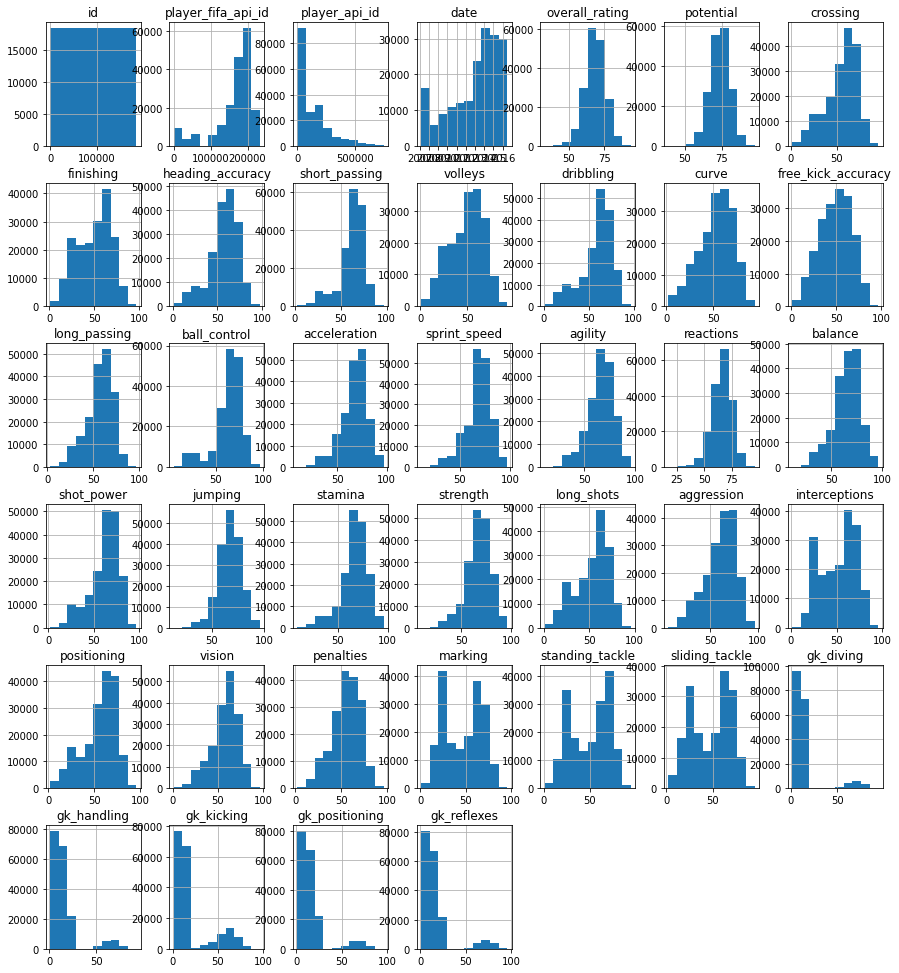

In [737]:
# histogram of players attribute

players_attr_df.hist(layout=(7,7), figsize=(15,20));

*************
### league_df

In [738]:
league_df.shape

(11, 3)

In [739]:
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_id    11 non-null     int64 
 1   league_name   11 non-null     object
 2   country_name  11 non-null     object
dtypes: int64(1), object(2)
memory usage: 392.0+ bytes


In [740]:
league_df.head()

,country_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy


### Export clean df to csv

In [741]:
teams_df.to_csv("team_v1.csv", index=False)
team_attr_df.to_csv("team_attri_v1.csv", index=False)
players_df.to_csv("players_v1.csv", index=False)
players_attr_df.to_csv("players_attri_v1.csv", index=False)
match_df.to_csv("match_v1.csv", index=False)
league_df.to_csv("league_v1.csv", index=False)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which team had scored the most goals?

### Research Question 2: What team improved the most over the time period?

### Research Question 3: Which player had the most penalties?

### Research Question 4: What attributes that lead teams to most victories?

<a id='conclusions'></a>
## Conclusions

